<img src='https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png' alt="SUT logo" width=300 height=300 align=center class="saturate" >

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Artificial Intelligence <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024<br>
<font color=3C99D size=5>
    Practical Assignment 3 - Hidden Markov Model  <br>
<font color=696880 size=4>
Parsa Sharifi

# Personal Data


In [3]:
# Set your student number and name
student_number = None
Name = None
Last_Name = None

In [4]:
!pip install hmmlearn

In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm

In [6]:
# Define a function to plot the hidden states
def plot_hidden_states(model, X, lengths=None):
    hidden_states = model.predict(X, lengths)

    fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True, figsize=(10, 8))
    colors = plt.cm.get_cmap("viridis", model.n_components)

    for i, ax in enumerate(axs):
        mask = hidden_states == i
        ax.plot(X[mask], ".-", color=colors(i), ms=6, label=f"Hidden State {i}")
        ax.set_title(f"Hidden State {i}")
        ax.legend()

    plt.xlabel("Time Step")
    plt.show()


In [10]:
# Define the parameters of a more complex HMM with 4 hidden states and 4 possible observations

# Transition probabilities (4x4 matrix for 4 hidden states)
A = np.array([
    [0.6, 0.1, 0.2, 0.1],
    [0.2, 0.5, 0.2, 0.1],
    [0.1, 0.3, 0.4, 0.2],
    [0.3, 0.2, 0.2, 0.3]
])

# Emission probabilities (4x4 matrix for 4 states and 4 observations)
B = np.array([
    [0.5, 0.2, 0.2, 0.1],
    [0.1, 0.3, 0.4, 0.2],
    [0.2, 0.4, 0.1, 0.3],
    [0.3, 0.1, 0.3, 0.3]
])

# Initial probabilities for 4 states
pi = np.array([0.4, 0.3, 0.2, 0.1])

# Generate a longer sequence of observations for more complexity
observations = np.array([0, 1, 3, 2, 1, 0, 3, 3, 1, 2, 0, 1, 2, 3, 0, 1, 2, 2, 3, 1])


In [7]:
# Viterbi Algorithm to determine the most probable state sequence

def viterbi(obs, A, B, pi):
    ''' your code '''
    return Z, T1, T2


In [8]:
import numpy as np

def viterbi(obs, A, B, pi):
    """
    Viterbi algorithm to find the most probable sequence of hidden states.

    Parameters:
    obs : list
        Sequence of observed states.
    A : 2D numpy array
        State transition probability matrix.
    B : 2D numpy array
        Observation probability matrix.
    pi : 1D numpy array
        Initial state distribution.

    Returns:
    Z : list
        The most probable sequence of hidden states.
    T1 : 2D numpy array
        Probability of the most likely path so far.
    T2 : 2D numpy array
        Backpointer to keep track of the states.
    """
    # Number of states (N) and number of observations (T)
    N = A.shape[0]
    T = len(obs)

    # Initialize T1 and T2 matrices
    T1 = np.empty((T, N))
    T2 = np.empty((T, N), dtype=int)

    # Initialize T1 with the initial state distribution and observation likelihoods
    for index in range(len(T1[0])):
        T1[0][index] = pi[index] * B[index][obs[0]]
    
    # Dynamic programming to fill T1 and T2
            # Calculate the probability for each state
    for t in range(1, T):
        for j in range(N):
            max_p = 0
            for i in range(N):
                p = T1[t-1][i] * A[i][j] * B[j][obs[t]]
                if p > max_p:
                    max_p = p
                    T2[t][j] = i
            T1[t][j] = max_p
    

    # Start backtracking from the last state with the highest probability
    p_star = 0
    index_star = 0
    for i in range(N):
        if T1[T-1][i] > p_star:
            p_star = T1[T-1][i]
            index_star = i
            
    # Follow backpointers to reconstruct the path
    Z = np.empty(T, dtype=int)
    Z[T-1] = index_star
    state = index_star
    for i in range(T-2, -1, -1):
        Z[i] = T2[i+1][state]
        state = Z[i]
        
    return Z, T1, T2


In [11]:
# Run the Viterbi algorithm
optimal_path, T1, T2 = viterbi(observations, A, B, pi)
print("Optimal state sequence (from scratch):", optimal_path)


Optimal state sequence (from scratch): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1]


Use hmmlearn and check the results:

In [12]:
# Using hmmlearn CategoricalHMM to check the results
try:

    ''' your code '''

    # Initialize a Hidden Markov Model with 4 hidden states
    model = hmm.CategoricalHMM(n_components=4)

    # Set the model's initial state probabilities
    model.startprob_ = pi

    # Set the transition probability matrix for the model
    model.transmat_ = A

    # Set the emission probability matrix, which defines probabilities of observations given each state
    model.emissionprob_ = B

    # Reshape the observations to match the expected input shape for hmmlearn (each observation as a separate row)
    X = np.atleast_2d(observations).T

    # Use the Viterbi algorithm to decode the sequence and find the most likely state sequence
    state_sequence = model.predict(X)
    
    # Print the resulting optimal state sequence determined by the model
    print("Optimal state sequence (using hmmlearn):", state_sequence)


    # Comparison of results
    assert np.array_equal(optimal_path, state_sequence), "Mismatch between custom implementation and hmmlearn!"
    print("Both implementations yield the same optimal state sequence.")

except AttributeError:
    print("CategoricalHMM is not available in this hmmlearn version. Consider downgrading hmmlearn or using another library like pomegranate.")


Optimal state sequence (using hmmlearn): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1]
Both implementations yield the same optimal state sequence.


Apply plot_hidden_states function and explain the results:

C:\Users\masoud\AppData\Local\Temp\ipykernel_22556\3951633505.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("viridis", model.n_components)


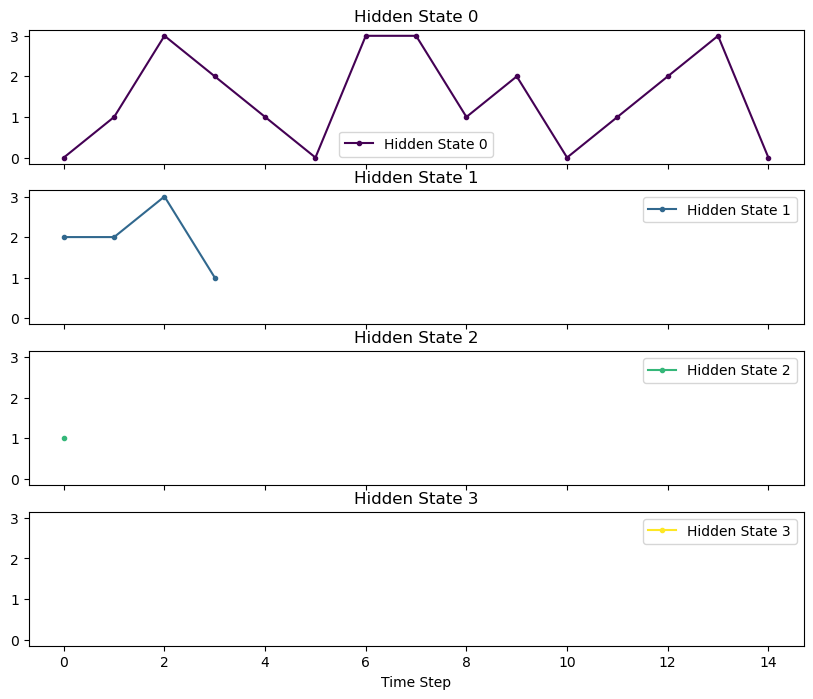

In [18]:
plot_hidden_states(model, X)

Now apply forward-backward algorithm:

In [20]:

def forward_backward(obs, A, B, pi):
    """
    Forward-Backward algorithm for HMMs.

    Parameters:
    obs : list
        Sequence of observed states (encoded as integers).
    A : 2D numpy array
        State transition probability matrix.
    B : 2D numpy array
        Observation probability matrix.
    pi : 1D numpy array
        Initial state distribution.

    Returns:
    gamma : 2D numpy array
        Posterior probabilities of states at each time step.
    """
    N = A.shape[0]  # Number of states
    T = len(obs)    # Number of observations

    # Initialize alpha with the initial probabilities
    alpha = np.zeros((T, N))
    alpha[0, :] = pi * B[obs[0], :]  
    
    # Step 1: Forward procedure
    for t in range(1, T):
        observation = obs[t]
        for j in range(N):
            # p = 0
            for i in range(N):
                alpha[t][j] += alpha[t-1][i] * A[i][j] * B[j][obs[t]]
            # alpha[t][j] = p
      
    # Termination  
    p_forward = 0    
    for i in range(N):
        p_forward += alpha[T-1][i]
        
    # Step 2: Backward procedure
    beta = np.empty((T, N))
    beta[T-1, :] = 1  # Initialize beta with 1 at the last observation
    
    # Recursion
    for t in range(T-2, -1, -1):
        for i in range(N):
            value = 0
            for j in range(N):
                value += beta[t+1][j] * A[i][j] * B[j][obs[t+1]]
            beta[t][i] = value
                
    # Step 3: Calculate the posterior probabilities (gamma)
    gamma = np.empty((T, N))
    for t in range(T):
        for i in range(N):
            gamma[t][i] = alpha[t][i] * beta[t][i] / p_forward

    return gamma, alpha, beta


In [21]:
gamma, alpha, beta = forward_backward(observations, A, B, pi)
print("Posterior probabilities (gamma): \n", gamma)

Posterior probabilities (gamma): 
 [[0.58259475 0.22395698 0.1635261  0.02992217]
 [0.27003608 0.25547596 0.42585628 0.04863168]
 [0.12498464 0.30337412 0.36881429 0.20282695]
 [0.1978597  0.48943956 0.11632311 0.19637763]
 [0.28827654 0.32664455 0.31828337 0.06679553]
 [0.40932057 0.13396433 0.27254845 0.18416664]
 [0.14929063 0.20585159 0.42080892 0.22404886]
 [0.10726079 0.27539147 0.40140364 0.21594411]
 [0.17449114 0.37242973 0.37863561 0.07444352]
 [0.25498671 0.44231831 0.09911501 0.20357997]
 [0.48195527 0.15747814 0.2047054  0.15586119]
 [0.27425149 0.28523297 0.37797662 0.06253892]
 [0.22183922 0.44327511 0.13113363 0.20375204]
 [0.19962295 0.27145717 0.29125424 0.23766564]
 [0.41576691 0.147234   0.25100225 0.18599684]
 [0.23393826 0.31266142 0.3899755  0.06342482]
 [0.18015695 0.52991665 0.11076301 0.1791634 ]
 [0.18966306 0.52592256 0.1066552  0.17775918]
 [0.13228975 0.343536   0.34424573 0.17992852]
 [0.18590041 0.35434612 0.39476224 0.06499124]]
